## 1. Import libraries, test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## 2. Generate interpolation expected prediction values
The interpolated x-points should be the mean of the 2 points, and we assume (and expect) their respective y-values to be the mean of the 2 points y-values.

In [2]:
x_test = []
y_test = []

for i in range(0, len(x) - 1):
    x_test.append(((x[i] + x[i + 1]) / 2).tolist())
    y_test.append((y[i] + y[i + 1]) / 2)

## 3. Training the Decision Tree Regression model

In [3]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x, y)

y_test_predicted = model.predict(x_test)

## 4. Display graph and details

The cyan data points are the interpolated x-points, and the red data points are the actual x-points with the true y-value. The blue line represents the predict values at the given x-point.

The depth is the number of levels excluding the root level (e.g. depth of 1 is 2 terminal leaves). The number of leaves are the number of terminal points.

In this example, there will be only 1 feature (e.g. position level) considered.

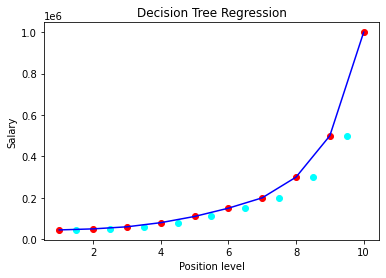

===== Tree Diagram ======
Depth:  6
No. of leaves:  10


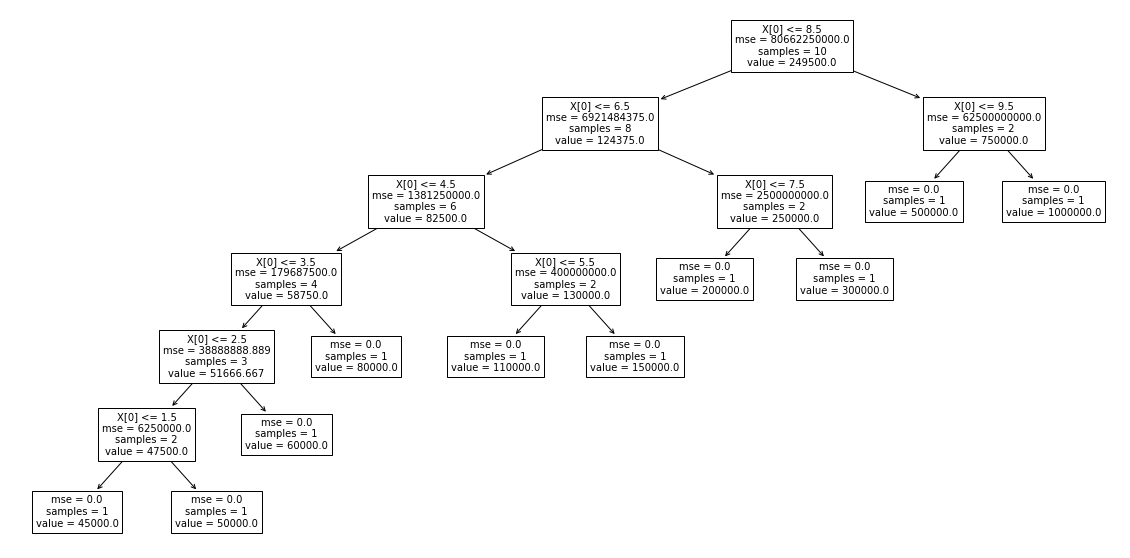

In [4]:
from sklearn.tree import plot_tree

plt.scatter(x, y, color='red')
plt.scatter(x_test, y_test_predicted, color='cyan')
plt.plot(x, model.predict(x), color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

print('===== Tree Diagram ======')
print('Depth: ', model.get_depth())
print('No. of leaves: ', model.get_n_leaves())

plt.figure(figsize=(20,10))
out = plot_tree(model, fontsize=10)

## 5. Find errors in predicted interpolated data
Display the predicted y-value from interpolated x-points against the existing true x-points.

In [8]:
from itertools import zip_longest, chain

df = pd.DataFrame(chain(
        zip_longest(x_test, y_test, y_test_predicted, map(lambda _: 0, x_test)), 
        zip_longest(x, y, y, map(lambda _: 1, x))
    ), columns=['x-values', 'y-value', 'y-predicted-value', 'y-value-is-true'])
df['residual-epsilon'] = df['y-value'] - df['y-predicted-value']
df.sort_values('x-values')

,x-values,y-value,y-predicted-value,y-value-is-true,residual-epsilon
9,[1],45000.0,45000.0,1,0.0
0,[1.5],47500.0,45000.0,0,2500.0
10,[2],50000.0,50000.0,1,0.0
1,[2.5],55000.0,50000.0,0,5000.0
11,[3],60000.0,60000.0,1,0.0
2,[3.5],70000.0,60000.0,0,10000.0
12,[4],80000.0,80000.0,1,0.0
3,[4.5],95000.0,80000.0,0,15000.0
13,[5],110000.0,110000.0,1,0.0
4,[5.5],130000.0,110000.0,0,20000.0
